# SPAM SMS DETECTION

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('spam.csv', encoding='latin-1')

df = pd.DataFrame(data)

le = LabelEncoder()
df['label'] = le.fit_transform(df['v1'])

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['v2'])
y = df['label']


In [8]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [18]:
def predict(msg):
    msg_vector = tfidf.transform([msg])
    prediction = clf.predict(msg_vector)
    return 'spam' if prediction == 1 else 'Not a spam'

message = 'Congratulations! You have won a free ticket to Bahamas. Text WIN to 12345 to claim.'
result = predict(message)
print(f"The message '{message}' is classified as: {result}")

The message 'Congratulations! You have won a free ticket to Bahamas. Text WIN to 12345 to claim.' is classified as: spam


In [9]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.9893955461293743
Recall: 0.9873015873015873
F1-Score: 0.9883474576271186

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       985
           1       0.99      0.99      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



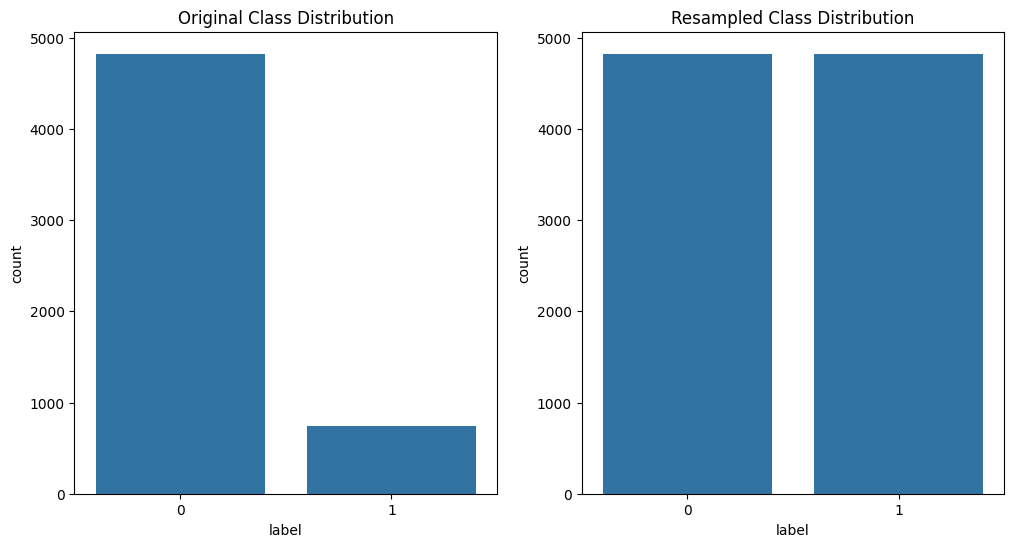

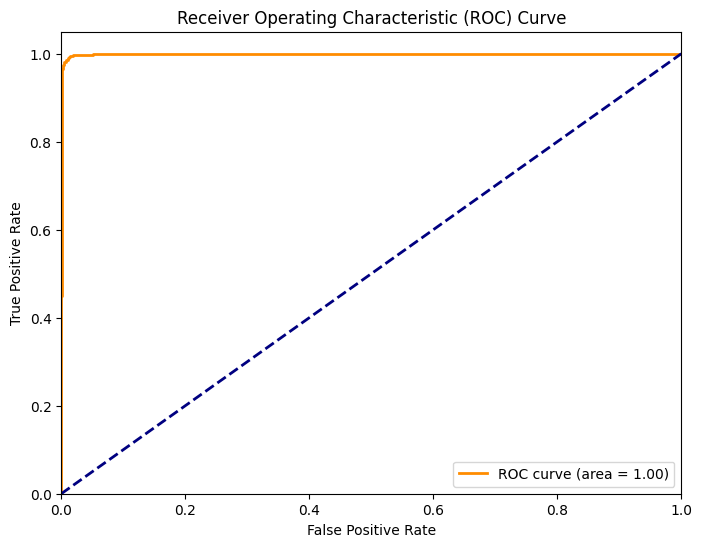

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='label', data=df, ax=ax[0])
ax[0].set_title('Original Class Distribution')

sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title('Resampled Class Distribution')

plt.show()

# ROC Curve and AUC
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
